In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

**We have the updated dataframes after data accessing and data cleaning.**

In [26]:
df = pd.read_csv('../dataframes/marketing_digital_after_accessing_cleaning_with_specific_dtypes.csv')
df = df.astype({
    'month': 'category',
    'day': 'int16',
    'campaign_number': 'category',
    'user_engagement': 'category',
    'displays': 'int32',
    'cost': 'float16',
    'clicks': 'int16',
    'revenue': 'float16',
    'post_click_conversions': 'int16',
    'post_click_sales_amount': 'float32',
    'updated_placement': 'category',
    'banner_width': 'int64',
    'banner_height': 'int64',
    'banner_area': 'int64'
})
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000


In [27]:
df.shape

(15403, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   month                    15403 non-null  category
 1   day                      15403 non-null  int16   
 2   campaign_number          15403 non-null  category
 3   user_engagement          15403 non-null  category
 4   displays                 15403 non-null  int32   
 5   cost                     15403 non-null  float16 
 6   clicks                   15403 non-null  int16   
 7   revenue                  15403 non-null  float16 
 8   post_click_conversions   15403 non-null  int16   
 9   post_click_sales_amount  15403 non-null  float32 
 10  updated_placement        15403 non-null  category
 11  banner_width             15403 non-null  int64   
 12  banner_height            15403 non-null  int64   
 13  banner_area              15403 non-null  int64   
dtypes: cat

***EDA***

**Column Types**
- Categorical : month,campaign_number,user_engagement,updated_placement
- Numerical : day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,banner_width,banner_height,banner_area


**Q1) What is the overall trend in user engagement throughout the campaign period?**

In [31]:
df['user_engagement'].value_counts()

user_engagement
Medium    5489
Low       5033
High      4881
Name: count, dtype: int64

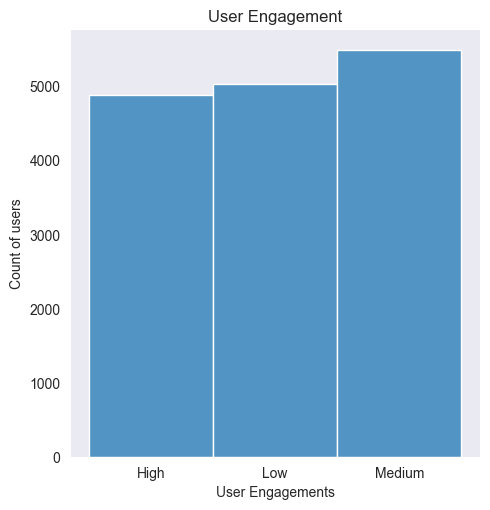

In [49]:
sns.displot(data = df, x = 'user_engagement', kind = 'hist')
plt.title('User Engagement')
plt.xlabel('User Engagements')
plt.ylabel('Count of users')
plt.show()

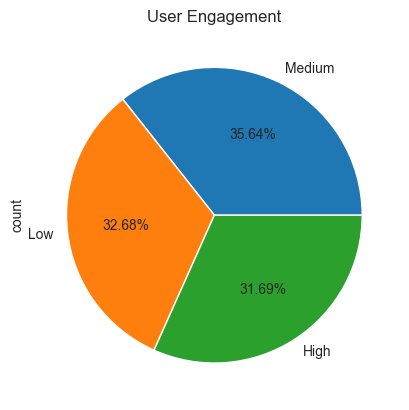

In [67]:
df['user_engagement'].value_counts().plot(kind='pie',autopct='%0.02f%%')
plt.title('User Engagement')
plt.show()

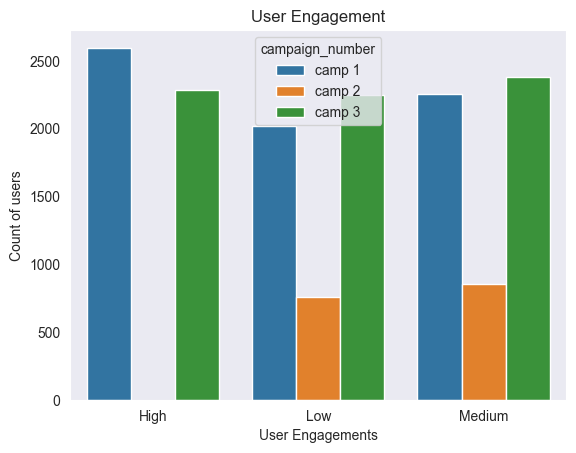

In [68]:
sns.countplot(data = df,x = 'user_engagement',hue = 'campaign_number')
plt.title('User Engagement')
plt.xlabel('User Engagements')
plt.ylabel('Count of users')
plt.show()

In [76]:
cross_tab = pd.crosstab(df['user_engagement'],df['campaign_number'])

In [77]:
cross_tab

campaign_number,camp 1,camp 2,camp 3
user_engagement,,,
High,2597,0,2284
Low,2023,761,2249
Medium,2253,853,2383


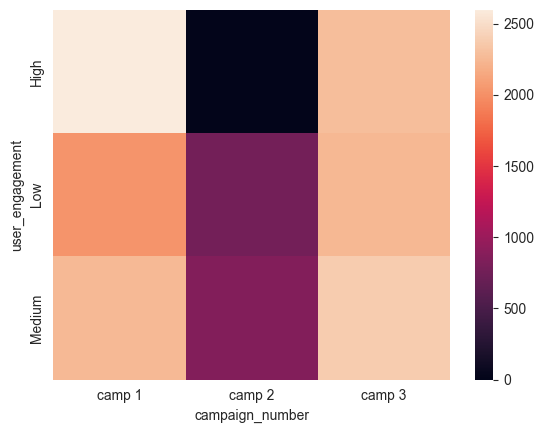

In [79]:
sns.heatmap(cross_tab)
plt.show()

**Conclusions on User Engagements**
- Medium engagements slightly surpass both Low and High user engagements, holding a slight edge in comparison.
- Examining the data in terms of campaign numbers:
  1. For Campaign 1, user engagements are nearly equal across categories but show a slight edge in High engagements.
  2. Campaign 2 records engagements primarily in Low and Medium categories.
  3. In the case of Campaign 3, engagements are nearly balanced across all types.
- The camp 1 category, exhibiting high user engagement, is characterized by the maximum number of user engagements observed in the heatmap.
- The camp 2 category, marked by high user engagement, registers zero values in the heatmap.


**Q2) How does the size of the ad (banner) impact the number of clicks generated?**

In [73]:
df2 = pd.read_csv('../dataframes/online_advertising_performance_data.csv')
df['banner'] = df2['banner']
df['banner'] = df['banner'].astype('category')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   month                    15403 non-null  category
 1   day                      15403 non-null  int16   
 2   campaign_number          15403 non-null  category
 3   user_engagement          15403 non-null  category
 4   displays                 15403 non-null  int32   
 5   cost                     15403 non-null  float16 
 6   clicks                   15403 non-null  int16   
 7   revenue                  15403 non-null  float16 
 8   post_click_conversions   15403 non-null  int16   
 9   post_click_sales_amount  15403 non-null  float32 
 10  updated_placement        15403 non-null  category
 11  banner_width             15403 non-null  int64   
 12  banner_height            15403 non-null  int64   
 13  banner_area              15403 non-null  int64   
 14  banner